In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set path to Figures
figures = os.path.join(os.getcwd(), 'Figures')
print("Figures will be saved in: ", figures)
if not os.path.exists(figures):
    os.makedirs(figures)

# set style for seaborn and size of figures
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [9, 6]

Figures will be saved in:  c:\Users\User\OneDrive\Documentos\Teaching\PolEcon-Oxford2025\03 Simulations\Week1\Figures


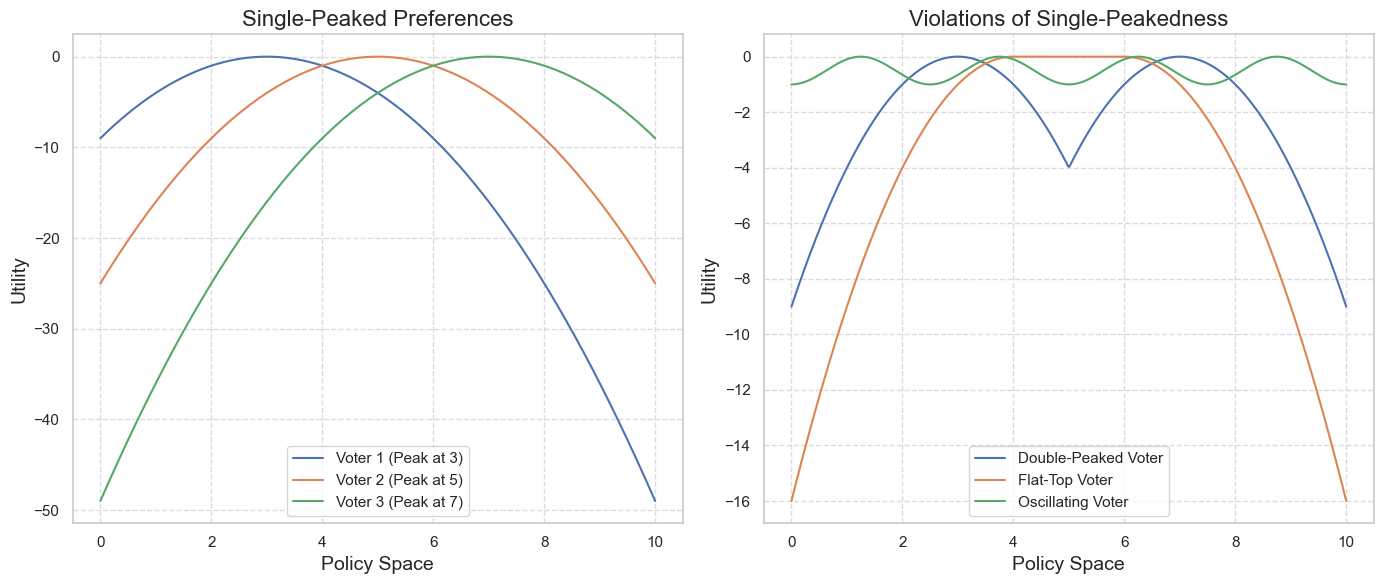

In [4]:
# Set up policy space
policy_space = np.linspace(0, 10, 500)

# Define peaks for 'good' single-peaked voters
peak_voter_1 = 3
peak_voter_2 = 5
peak_voter_3 = 7

# Single-peaked utility
def single_peaked_utility(x, peak):
    return - (x - peak)**2

# Violating utility examples
def double_peaked_utility(x, peak1, peak2):
    return -np.minimum((x - peak1)**2, (x - peak2)**2)

def flat_top_utility(x, start, end):
    return -np.maximum(np.abs(x - (start + end)/2) - (end - start)/2, 0)**2

def oscillating_utility(x):
    return -np.cos(2 * np.pi * x / 5)**2

# Calculate utilities
utility_voter_1 = single_peaked_utility(policy_space, peak_voter_1)
utility_voter_2 = single_peaked_utility(policy_space, peak_voter_2)
utility_voter_3 = single_peaked_utility(policy_space, peak_voter_3)

utility_violation_1 = double_peaked_utility(policy_space, 3, 7)
utility_violation_2 = flat_top_utility(policy_space, 4, 6)
utility_violation_3 = oscillating_utility(policy_space)

# Create figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left panel: Single-peaked
axs[0].plot(policy_space, utility_voter_1, label="Voter 1 (Peak at 3)")
axs[0].plot(policy_space, utility_voter_2, label="Voter 2 (Peak at 5)")
axs[0].plot(policy_space, utility_voter_3, label="Voter 3 (Peak at 7)")
axs[0].set_title("Single-Peaked Preferences", fontsize=16)
axs[0].set_xlabel("Policy Space", fontsize=14)
axs[0].set_ylabel("Utility", fontsize=14)
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Right panel: Violations
axs[1].plot(policy_space, utility_violation_1, label="Double-Peaked Voter")
axs[1].plot(policy_space, utility_violation_2, label="Flat-Top Voter")
axs[1].plot(policy_space, utility_violation_3, label="Oscillating Voter")
axs[1].set_title("Violations of Single-Peakedness", fontsize=16)
axs[1].set_xlabel("Policy Space", fontsize=14)
axs[1].set_ylabel("Utility", fontsize=14)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(figures, 'single_peakedness_illustration.png'), dpi=300)
plt.show()

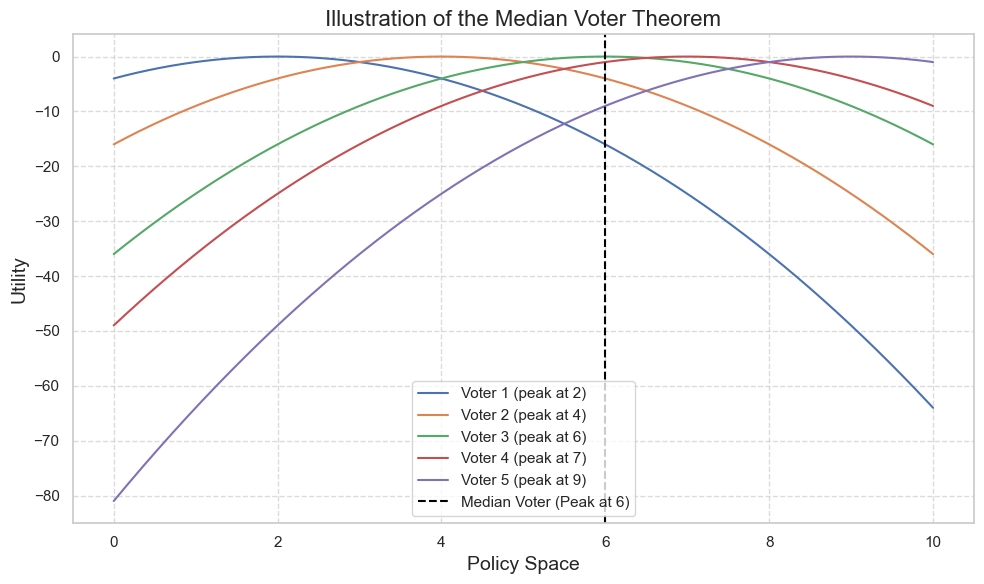

In [5]:
# Define voters' ideal points (sorted)
voters_ideal_points = [2, 4, 6, 7, 9]  # 5 voters, ideal points on policy line

# Define policy space
policy_space = np.linspace(0, 10, 500)

# Simple single-peaked utility function centered at each voter's peak
def single_peaked_util(x, peak):
    return - (x - peak)**2

# Set up plot
plt.figure(figsize=(10, 6))

# Plot each voter's utility curve
for idx, peak in enumerate(voters_ideal_points):
    plt.plot(policy_space, single_peaked_util(policy_space, peak), label=f"Voter {idx+1} (peak at {peak})")

# Highlight the median voter
median_voter_peak = voters_ideal_points[len(voters_ideal_points) // 2]
plt.axvline(median_voter_peak, color='black', linestyle='--', label=f"Median Voter (Peak at {median_voter_peak})")

# Plot aesthetics
plt.title("Illustration of the Median Voter Theorem", fontsize=16)
plt.xlabel("Policy Space", fontsize=14)
plt.ylabel("Utility", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(figures, 'median_voter_theorem.png'), dpi=300)
plt.show()
